# Used Car Sales EDA and Data Cleaning

## Exploratory Data Analysis (EDA)

In [2]:
##Load in data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cars = pd.read_csv('vehicles.csv', parse_dates=["posting_date"], na_values=['other'])

In [3]:
##Explore numerical features
cars.describe(include=[np.number])

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [4]:
##Explore categorical features
cars.describe(include=[object])

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,458213,458213,458213,439993,453365,265273,285961,438617,455636,423585,270664,324025,136865,321315,317370,458185,458143,458213,458185
unique,458213,405,413,43,31519,6,7,4,6,2,133620,3,4,12,12,285404,384347,51,373175
top,https://losangeles.craigslist.org/sfv/ctd/d/fa...,columbus,https://bend.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1C4HJWDG6HL702229,4wd,full-size,sedan,white,https://images.craigslist.org/00c0c_1gCUGosl6w...,"👉 BAD Credit, NO Credit - OKAY! We FINANCE ANY...",ca,2020-12-01 07:50:10-07:00
freq,1,3818,2989,79666,8370,115685,105677,399399,439626,396322,194,139693,69736,92364,82786,194,247,51856,9


Text(0, 0.5, 'Frequency')

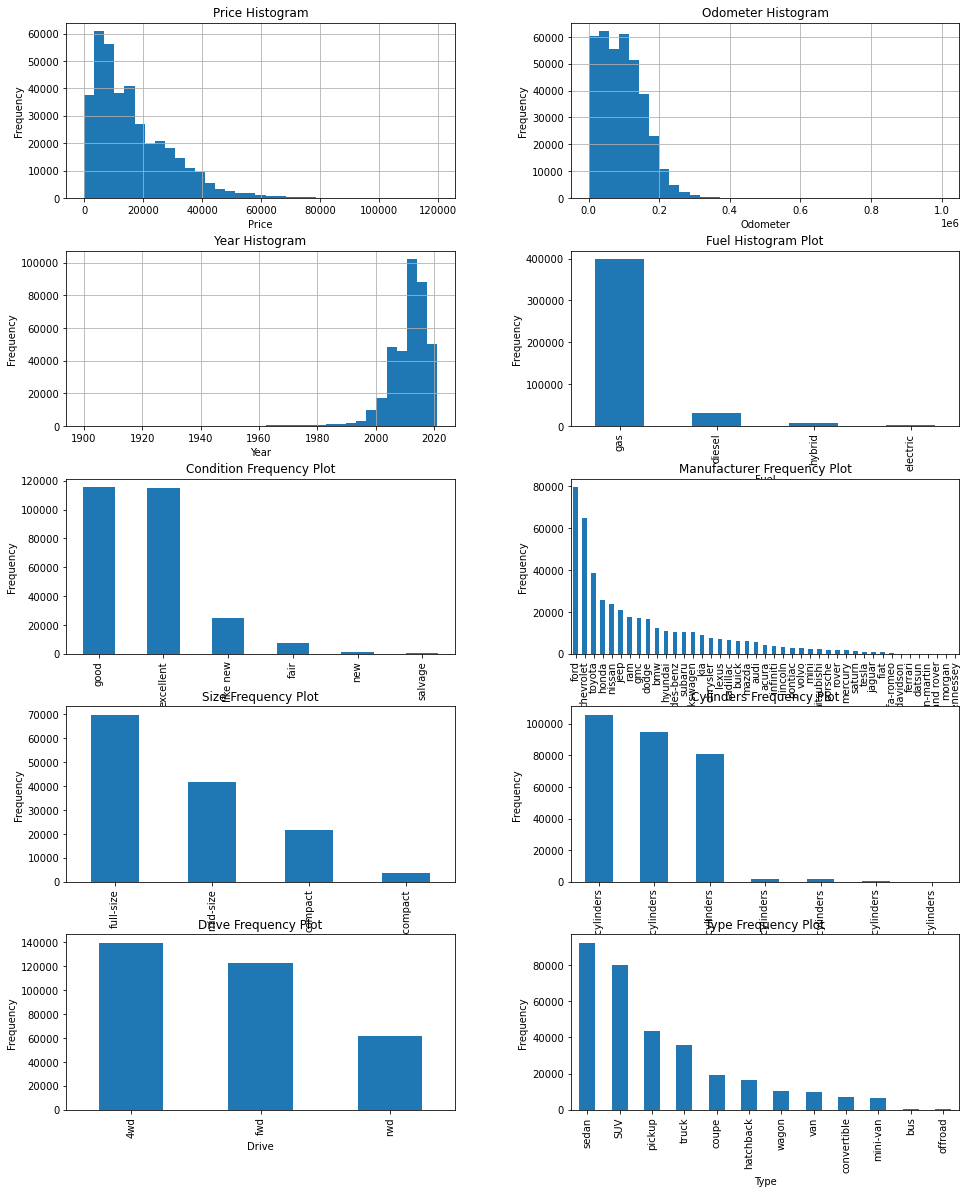

In [5]:
##Visualise the distribtions of important features (removing outliers to see true distributions)

##filter out outliers of price and odometer
price_hi = cars['price'].quantile(0.999)
price_lo = cars['price'].quantile(0.001)

odom_hi = cars['odometer'].quantile(0.999)
odom_lo = cars['odometer'].quantile(0.001)

cars_filtered = cars[(cars['price'] < price_hi) & (cars['price'] > price_lo) & (cars['odometer'] < odom_hi) & (cars['odometer'] > odom_lo)]

##Plot distributions
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,20))

cars_filtered.hist(column='price', bins=35, ax=ax[0][0])
cars_filtered.hist(column='odometer', bins=35, ax=ax[0][1])


cars_filtered.hist(column='year', bins=35, ax=ax[1][0])
cars['fuel'].value_counts().plot(kind='bar', ax=ax[1][1])

cars['condition'].value_counts().plot(kind='bar', ax=ax[2][0])
cars['manufacturer'].value_counts().plot(kind='bar', ax=ax[2][1])

cars['size'].value_counts().plot(kind='bar', ax=ax[3][0])
cars['cylinders'].value_counts().plot(kind='bar', ax=ax[3][1])

cars['drive'].value_counts().plot(kind='bar', ax=ax[4][0])
cars['type'].value_counts().plot(kind='bar', ax=ax[4][1])

ax[0][0].set_title("Price Histogram")
ax[0][0].set_xlabel("Price")
ax[0][0].set_ylabel("Frequency")

ax[0][1].set_title("Odometer Histogram")
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Frequency")

ax[1][0].set_title("Year Histogram")
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("Frequency")

ax[1][1].set_title("Fuel Histogram Plot")
ax[1][1].set_xlabel("Fuel")
ax[1][1].set_ylabel("Frequency")

ax[2][0].set_title("Condition Frequency Plot")
ax[2][0].set_xlabel("Condition")
ax[2][0].set_ylabel("Frequency")

ax[2][1].set_title("Manufacturer Frequency Plot")
ax[2][1].set_xlabel("Manufacturer")
ax[2][1].set_ylabel("Frequency")

ax[3][0].set_title("Size Frequency Plot")
ax[3][0].set_xlabel("Size")
ax[3][0].set_ylabel("Frequency")

ax[3][1].set_title("Cylinders Frequency Plot")
ax[3][1].set_xlabel("Cylinders")
ax[3][1].set_ylabel("Frequency")

ax[4][0].set_title("Drive Frequency Plot")
ax[4][0].set_xlabel("Drive")
ax[4][0].set_ylabel("Frequency")

ax[4][1].set_title("Type Frequency Plot")
ax[4][1].set_xlabel("Type")
ax[4][1].set_ylabel("Frequency")


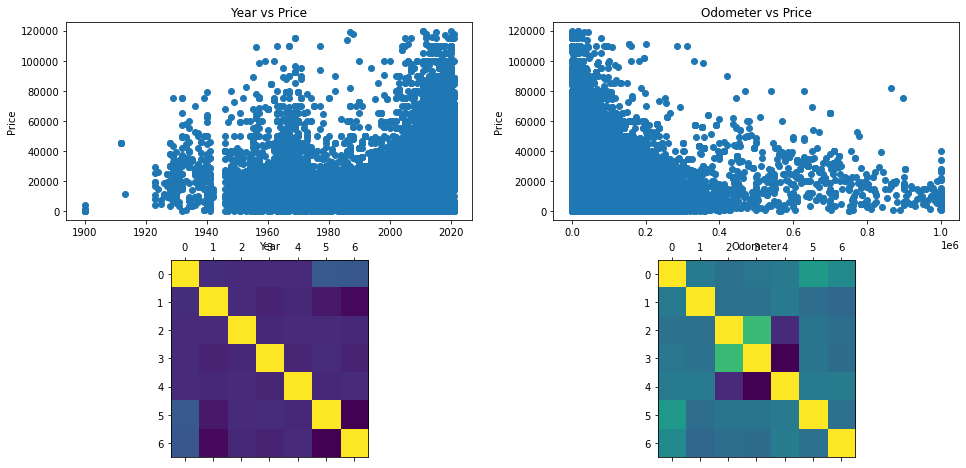

In [6]:
## Visualise some correlations between attributes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

##Price vs year
cars_filtered.plot(x='year', y='price', style='o', ax=ax[0][0])
ax[0][0].set_xlabel("Year")
ax[0][0].set_ylabel("Price")
ax[0][0].get_legend().remove()
ax[0][0].set_title("Year vs Price")

##Price vs odometer
cars_filtered.plot(x='odometer', y='price', style='o', ax=ax[0][1])
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Price")
ax[0][1].get_legend().remove()
ax[0][1].set_title("Odometer vs Price")

ax[1][0].matshow(cars.corr(method='pearson'))
ax[1][1].matshow(cars.corr(method='spearman'))


## Data Cleaning

Rows :  373187
Features : 16


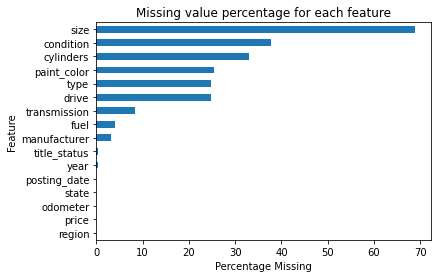

In [7]:
#Firstly ensure we are working with the dataset with removed outliers
cars = cars_filtered

#Remove obviously redundant features
cars = cars.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url', 'VIN', 'description', 'lat', 'long', 'model'], axis=1)

def displayStats(df):
    print("Rows : ", len(df))
    print("Features :", len(df.columns))
    
    missing = df.isnull().sum()/len(df)*100
    missing = missing.sort_values()
    ax = missing.plot.barh(x='Percentage Missing', y='Feature')

    ax.set_title("Missing value percentage for each feature")
    ax.set_xlabel("Percentage Missing")
    ax.set_ylabel("Feature")
    
displayStats(cars)

Rows :  373187
Features : 16
318011


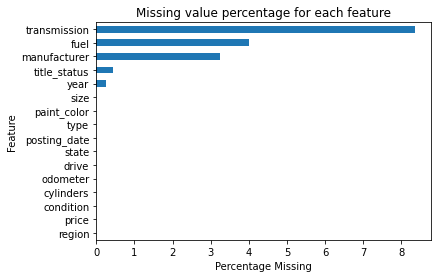

In [8]:
#Dropping all rows with missing data is not suitable, therefore we can fill in useful data

def fillCondition(row):
    if pd.isnull(row['condition']):
        year = row['year']
        if year>2019:
            return 'new'
        elif year>2017:
            return 'like new'
        elif year>2015:
            return 'excellent'
        elif year>2013:
            return 'good'
        else:
            return 'fair'
    else:
        return row['condition']


#condition - fill by year of car
cars['condition'] = cars.apply(fillCondition, axis=1)    


#Fill the rest through pandas fillna method
cars[['size', 'cylinders', 'paint_color', 'drive', 'type']] = cars[['size', 'cylinders', 'paint_color', 'drive', 'type']].fillna(method='ffill')

displayStats(cars)

cars_cleaned = cars.dropna()

print(len(cars_cleaned))

Text(0, 0.5, 'Frequency')

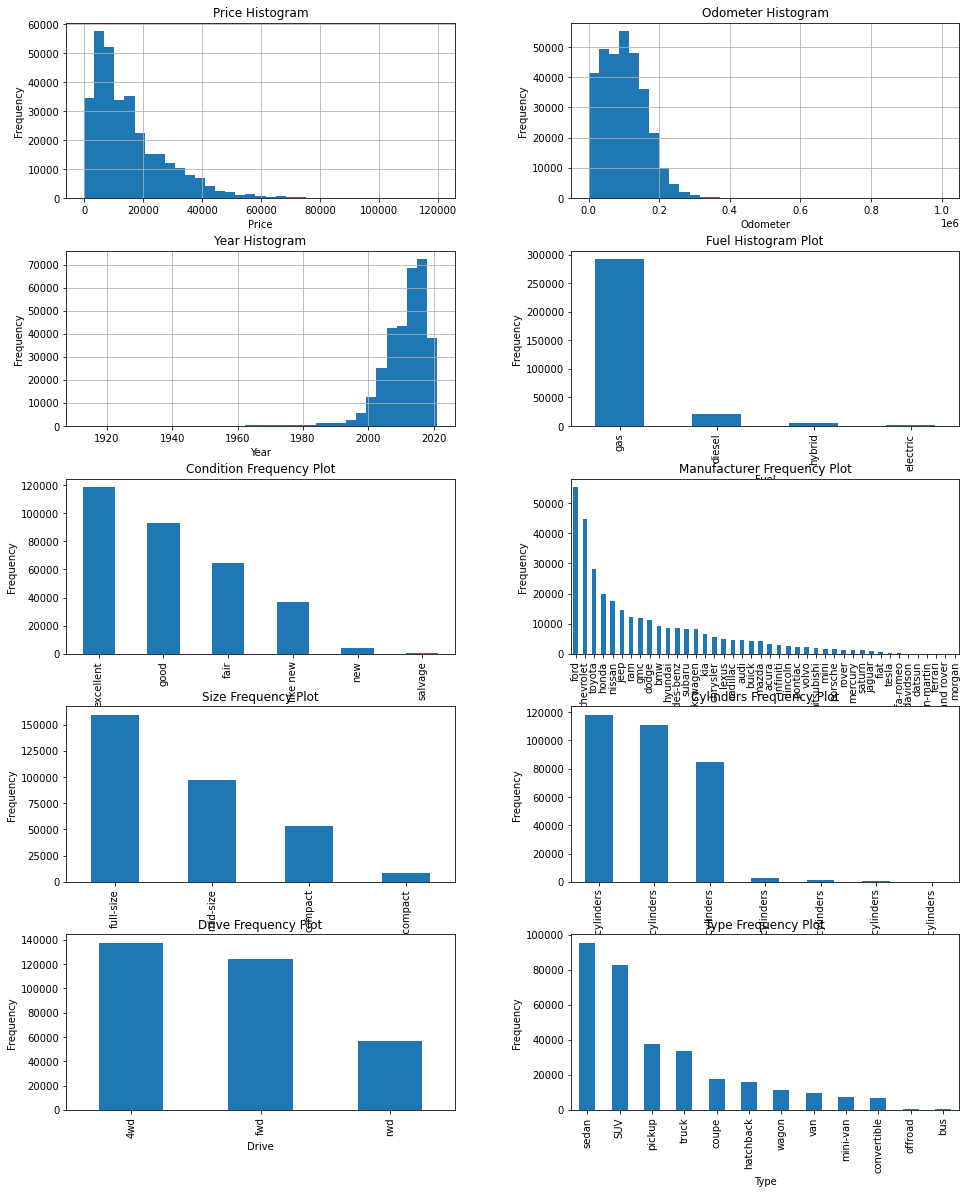

In [9]:
##Plot distributions of cleaned data

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,20))

cars_cleaned.hist(column='price', bins=35, ax=ax[0][0])
cars_cleaned.hist(column='odometer', bins=35, ax=ax[0][1])


cars_cleaned.hist(column='year', bins=35, ax=ax[1][0])
cars_cleaned['fuel'].value_counts().plot(kind='bar', ax=ax[1][1])

cars_cleaned['condition'].value_counts().plot(kind='bar', ax=ax[2][0])
cars_cleaned['manufacturer'].value_counts().plot(kind='bar', ax=ax[2][1])

cars_cleaned['size'].value_counts().plot(kind='bar', ax=ax[3][0])
cars_cleaned['cylinders'].value_counts().plot(kind='bar', ax=ax[3][1])

cars_cleaned['drive'].value_counts().plot(kind='bar', ax=ax[4][0])
cars_cleaned['type'].value_counts().plot(kind='bar', ax=ax[4][1])

ax[0][0].set_title("Price Histogram")
ax[0][0].set_xlabel("Price")
ax[0][0].set_ylabel("Frequency")

ax[0][1].set_title("Odometer Histogram")
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Frequency")

ax[1][0].set_title("Year Histogram")
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("Frequency")

ax[1][1].set_title("Fuel Histogram Plot")
ax[1][1].set_xlabel("Fuel")
ax[1][1].set_ylabel("Frequency")

ax[2][0].set_title("Condition Frequency Plot")
ax[2][0].set_xlabel("Condition")
ax[2][0].set_ylabel("Frequency")

ax[2][1].set_title("Manufacturer Frequency Plot")
ax[2][1].set_xlabel("Manufacturer")
ax[2][1].set_ylabel("Frequency")

ax[3][0].set_title("Size Frequency Plot")
ax[3][0].set_xlabel("Size")
ax[3][0].set_ylabel("Frequency")

ax[3][1].set_title("Cylinders Frequency Plot")
ax[3][1].set_xlabel("Cylinders")
ax[3][1].set_ylabel("Frequency")

ax[4][0].set_title("Drive Frequency Plot")
ax[4][0].set_xlabel("Drive")
ax[4][0].set_ylabel("Frequency")

ax[4][1].set_title("Type Frequency Plot")
ax[4][1].set_xlabel("Type")
ax[4][1].set_ylabel("Frequency")


In [10]:
##Encoding of categorical data

#Everything one hot encoded apart from cylinders, condition, size and posting date
encoded_cars = pd.get_dummies(cars_cleaned, columns=['region','manufacturer','fuel','title_status','transmission','drive','type','paint_color','state'])


##Ordinal encoding or cylinders, condition, size and posting date
encoded_cars['cylinders'].replace(to_replace=['12 cylinders', '10 cylinders', '8 cylinders', '6 cylinders', '5 cylinders',
 '4 cylinders', '3 cylinders'], value=[12, 10, 8,6,5,4,3], inplace=True)

encoded_cars['condition'].replace(to_replace=['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], value=[5,4,3,2,1,0], inplace=True)

encoded_cars['size'].replace(to_replace=['full-size', 'mid-size', 'compact', 'sub-compact'], value=[3,2,1,0], inplace=True)

encoded_cars['posting_date'] = encoded_cars['posting_date'].apply(lambda x: x.month)

In [11]:
##Normalisation 
cars_norm = (encoded_cars - encoded_cars.mean()) / (encoded_cars.max() - encoded_cars.min())

In [12]:
##Export to CSV
#cars_norm.to_csv(r'cleaned_cars.csv', index = False, header=True)


## Further EDA (now data has been cleaned and prepared)

|--- feature_0 <= 2013.50


|   |--- feature_3 <= 72835.50


|   |   |--- feature_465 <= 0.50


|   |   |   |--- feature_3 <= 37433.00


|   |   |   |   |--- feature_422 <= 0.50


|   |   |   |   |   |--- feature_0 <= 2008.50


|   |   |   |   |   |   |--- feature_443 <= 0.50


|   |   |   |   |   |   |   |--- feature_1 <= 2.50


|   |   |   |   |   |   |   |   |--- feature_0 <= 1996.50


|   |   |   |   |   |   |   |   |   |--- feature_226 <= 0.50


|   |   |   |   |   |   |   |   |   |   |--- feature_415 <= 0.50


|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 38
|   |   |   |   |   |   |   |   |   |   |--- feature_415 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_226 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [95000.00]
|   |   |   |   |   |   |   |   |--- feature_0 >  1996.50
|   |   |   |   |   |   |   |   |   |--- feature_463 <= 0.50

In [13]:
##Decision Trees
from sklearn import tree
from sklearn.tree import export_text

y = encoded_cars['price']
X = encoded_cars.drop(['price'], axis=1)

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

print(export_text(clf))
importances = clf.feature_importances_

|--- feature_0 <= 2014.50
|   |--- feature_0 <= 2010.50
|   |   |--- feature_453 <= 0.50
|   |   |   |--- feature_3 <= 86562.50
|   |   |   |   |--- feature_0 <= 1970.50
|   |   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |   |--- feature_518 <= 0.50
|   |   |   |   |   |   |   |--- feature_418 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 1940.50
|   |   |   |   |   |   |   |   |   |--- feature_264 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 1930.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  1930.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |--- feature_264 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [75000.00]
|   |   |   |   |   |   |   |   |--- feature_0 >  1940.50
|   |   |   |   |   |   |   |   |   |--- feature_444 <= 0.50
|   |   |   |   |   |   |   |   |  

In [14]:
indices = np.argsort(importances)
for i in indices[-10:]:
    print(X.columns[i])

manufacturer_mercedes-benz
type_truck
manufacturer_porsche
type_pickup
condition
cylinders
fuel_diesel
drive_fwd
odometer
year


In [43]:
import seaborn as sns

def pca_report_interactive(X, scale_X:bool=True, save_plot:bool=False):
    """
    X:          input data matrix
    scale_X:    determine whether to rescale X (StandardScaler) [default: True, X is not prescaled
    save_plot:  save plot to file (html) and not show
    """

    # calculate mean and var
    X_mean, X_var = X.mean(), X.var()
    print('\n*--- PCA Report ---*\n')
    print('X mean:\t\t',X_mean,'X variance:\t',X_var)

    if scale_X:
        # rescale and run PCA
        print("\n...Rescaling data...\n")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_s_mean, X_s_var = X_scaled.mean(), X_scaled.var()
        print(f'X_scaled mean:\t\t{np.round(X_s_mean):.3f}')
        print(f'X_scaled variance:\t{np.round(X_s_var):.3f}\n')
        pca_ = PCA().fit(X_scaled)
        X_pca = PCA().fit_transform(X)
    else:
        # run PCA directly
        print("...Assuming data is properly scaled...")
        pca_ = PCA().fit(X)
        X_pca = PCA().fit_transform(X)
            
    # Get cumulative explained variance for each dimension
    pca_evr = pca_.explained_variance_ratio_
    cumsum_ = np.cumsum(pca_evr)
    
    # Get dimensions where var >= 95% and values for variance at 2D, 3D
    dim_95 = np.argmax(cumsum_ >= 0.95) + 1
    twoD = np.round(cumsum_[1], decimals=3)*100 
    threeD = np.round(cumsum_[2], decimals=3)*100
    instances_, dims_ =  X.shape
    
    # check shape of X
    if dims_ > instances_:
        print("WARNING: number of features greater than number of instances.")
        dimensions = list(range(1, instances_+1))
    else:
        dimensions = list(range(1, dims_+1))
    
    # Print report
    print("\n -- Summary --")
    print(f"You can reduce from {dims_} to {dim_95} dimensions while retaining 95% of variance.")
    print(f"2 principal components explain {twoD:.2f}% of variance.")
    print(f"3 principal components explain {threeD:.2f}% of variance.")
    
    # output PCA info as a dataframe
    df_PCA = pd.DataFrame({'dimension': dimensions, 'variance_cumulative': cumsum_, 'variance': pca_evr}).set_index(['dimension'])
        
    return df_PCA, X_pca, pca_evr


def pca_feature_correlation(X, X_pca, explained_var, features:list=None, fig_dpi:int=150, save_plot:bool=False):
    """
    1. Get dot product of X and X_pca
    2. Run normalizations of X*X_pca
    3. Retrieve df/matrices

    X:               data (numpy matrix)
    X_pca:           PCA
    explained_var:   explained variance matrix
    features:        list of feature names
    fig_dpi:         dpi to use for heatmaps
    save_plot:       save plot to file (html) and not show
    """
    
    # Add zeroes for data where features > instances
    outer_diff = X.T.shape[0] - X_pca.shape[1]
    if outer_diff > 0: # outer dims must match to get sq matrix
        Z = np.zeros([X_pca.shape[0], outer_diff])
        X_pca = np.c_[X_pca, Z]
        explained_var = np.append(explained_var, np.zeros(outer_diff))
    
    # Get correlation between original features (X) and PCs (X_pca)
    dot_matrix = np.dot(X.T, X_pca)
    print(f"X*X_pca: {X.T.shape} * {X_pca.shape} = {dot_matrix.shape}")
    
    # Correlation matrix -> df
    df_dotproduct = pd.DataFrame(dot_matrix)
    df_dotproduct.columns = [''.join(['PC', f'{i+1}']) for i in range(dot_matrix.shape[0])]
    if any(features): df_dotproduct.index = features    
    
    # Normalize & Sort
    df_n, df_na, df_nabv = normalize_dataframe(df_dotproduct, explained_var, plot_opt=True, save_plot=save_plot)
    
    return df_dotproduct, df_n, df_na, df_nabv


def normalize_dataframe(df, explained_var=None, fig_dpi:int=150, plot_opt:bool=True, save_plot:bool=False):
    """
    1. Get z-normalized df (normalized to µ=0, σ=1)
    2. Get absolute value of z-normalized df
    3. If explained_variance matrix provided, dot it w/ (2)
    """
    # Normalize, Reindex, & Sort
    df_norm = (df.copy()-df.mean())/df.std()
    df_norm = df_norm.sort_values(list(df_norm.columns), ascending=False)
    
    # Absolute value of normalized (& sort)
    df_abs = df_norm.copy().abs().set_index(df_norm.index)
    df_abs = df_abs.sort_values(by=list(df_abs.columns), ascending=False)
    
    # Plot
    if plot_opt:
        # Z-normalized corr matrix
        plt.figure(dpi=fig_dpi)
        ax_normal = sns.heatmap(df_norm, cmap="RdBu")
        ax_normal.set_title("Z-Normalized Data")
        if save_plot:
            plt.savefig('Z_normalized_corr_matrix.png')
        else:
            plt.show()

        # |Z-normalized corr matrix|  
        plt.figure(dpi=fig_dpi)
        ax_abs = sns.heatmap(df_abs, cmap="Purples")
        ax_abs.set_title("|Z-Normalized|")
        if save_plot:
            plt.savefig('Z_normalized_corr_matrix_Abs.png')
        else:
            plt.show()
        
    # Re-normalize by explained var (& sort)
    if explained_var.any():
        df_byvar = df_abs.copy()*explained_var
        df_byvar = df_byvar.sort_values(by=list(df_norm.columns), ascending=False)
        if plot_opt:
            plt.figure(dpi=fig_dpi)
            ax_relative = sns.heatmap(df_byvar, cmap="Purples")
            ax_relative.set_title("|Z-Normalized|*Explained_Variance")
            if save_plot:
                plt.savefig('Normalized_corr_matrix.png')
            else:
                plt.show()
    else:
        df_byvar = None
    return df_norm, df_abs, df_byvar


def pca_rank_features(df_nabv, verbose:bool=True):
    """
    Given a dataframe df_nabv with dimensions [f, p], where:
        f = features (sorted)
        p = principal components
        df_nabv.values are |Z-normalized X|*pca_.explained_variance_ratio_
        
    1. Create column of sum of each row, sort by it 'score_'
    3. Set index as 'rank'
    """
    df_rank = df_nabv.copy().assign(score_ = df_nabv.sum(axis=1)).sort_values('score_', ascending=False)
    df_rank['feature_'] = df_rank.index
    df_rank.index = range(1, len(df_rank)+1)
    df_rank.drop(df_nabv.columns, axis=1, inplace=True)
    df_rank.index.rename('rank', inplace=True)
    if verbose: print(df_rank)
    return df_rank


def pca_full_report(X, features_:list=None, fig_dpi:int=150, save_plot:bool=False):
    """
    Run complete PCA workflow:
        1. pca_report_interactive()
        2. pca_feature_correlation()
        3. pca_rank_features()
        
    X:            data (numpy array)
    features_:    list of feature names
    fig_dpi:      image resolution
    
    """
    # Retrieve the interactive report
    df_pca, X_pca, pca_evr = pca_report_interactive(X, scale_X=False,save_plot=save_plot)
    # Get feature-PC correlation matrices
    df_corr, df_n, df_na, df_nabv = pca_feature_correlation(X, X_pca, pca_evr, features_, fig_dpi, save_plot) 
    # Get rank for each feature
    df_rank = pca_rank_features(df_nabv)
    return (df_pca, X_pca, pca_evr, df_corr, df_n, df_na, df_nabv, df_rank)

In [25]:
##SVD and PCA
from sklearn.decomposition import PCA 

def listPCs(df, n, prnt):
    pca = PCA()
    pca.fit(df)
    
    if(prnt):
        i = 1
        for pc in pca.components_:    
            print('PC'+str(i),'\t: ', df.columns[np.argmax(np.abs(pc))])
            i+=1
            if(i>n):
                break
    return pca.components_

def explainedVar(df, n):
    pca = PCA() if (n==0) else PCA(n)
    pca.fit(df)
    
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title("PCA explained variance ratio")
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
def varPerPC(df, n):
    pca = PCA() 
    pca.fit(df)
    
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title("PCA explained variance ratio")
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()


*--- PCA Report ---*

X mean:		 price       -5.407088e-18
year        -2.057375e-16
condition    3.181691e-17
cylinders   -4.598259e-17
odometer    -4.759131e-18
                 ...     
state_vt    -4.591556e-18
state_wa     6.837062e-18
state_wi    -1.845560e-17
state_wv     9.021123e-19
state_wy     1.910355e-18
Length: 544, dtype: float64 X variance:	 price        0.011417
year         0.004931
condition    0.038746
cylinders    0.031507
odometer     0.004109
               ...   
state_vt     0.007248
state_wa     0.030707
state_wi     0.030913
state_wv     0.002084
state_wy     0.002566
Length: 544, dtype: float64
...Assuming data is properly scaled...

 -- Summary --
You can reduce from 544 to 204 dimensions while retaining 95% of variance.
2 principal components explain 13.90% of variance.
3 principal components explain 17.80% of variance.
X*X_pca: (544, 318011) * (318011, 544) = (544, 544)


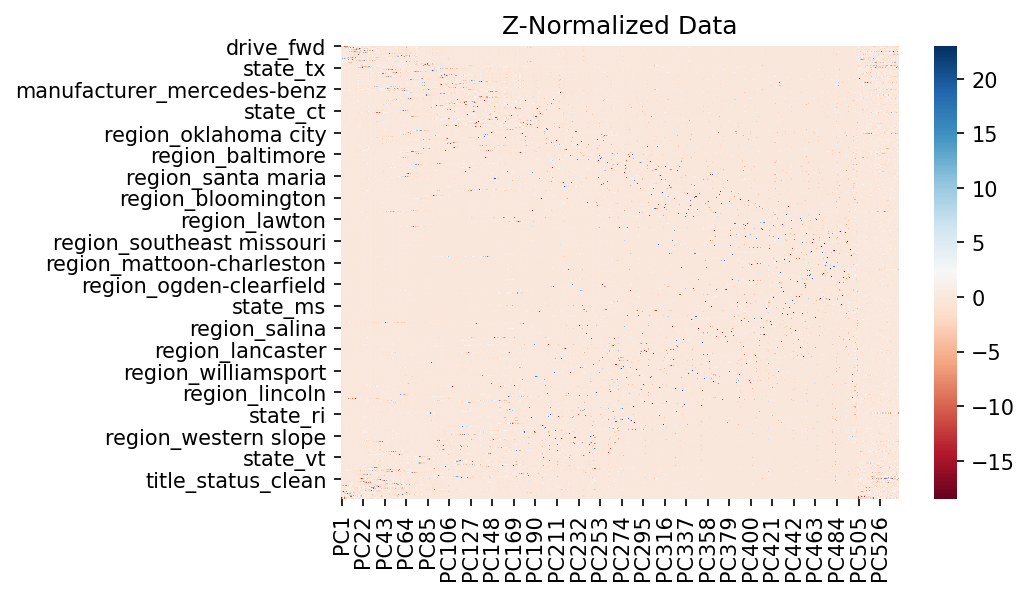

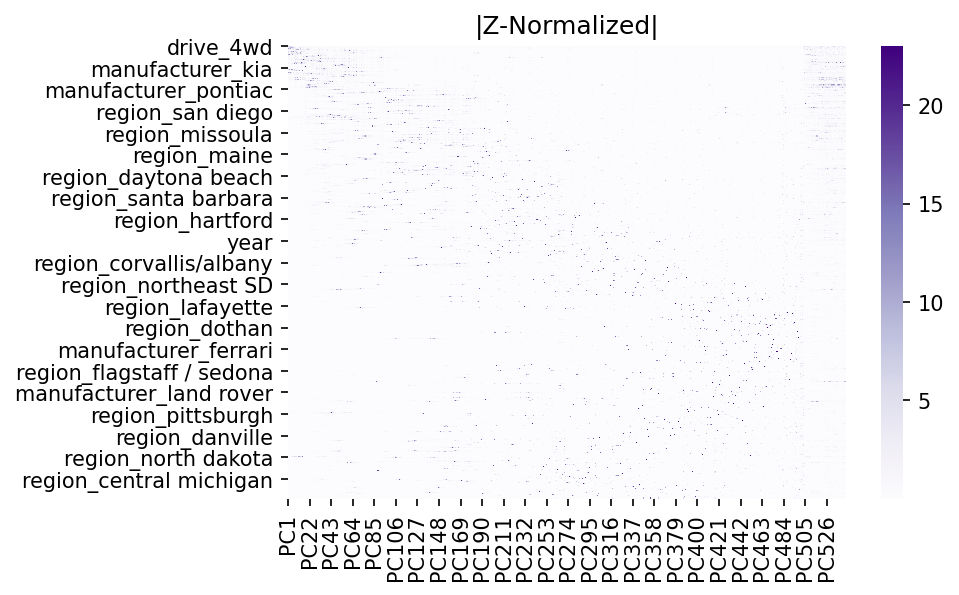

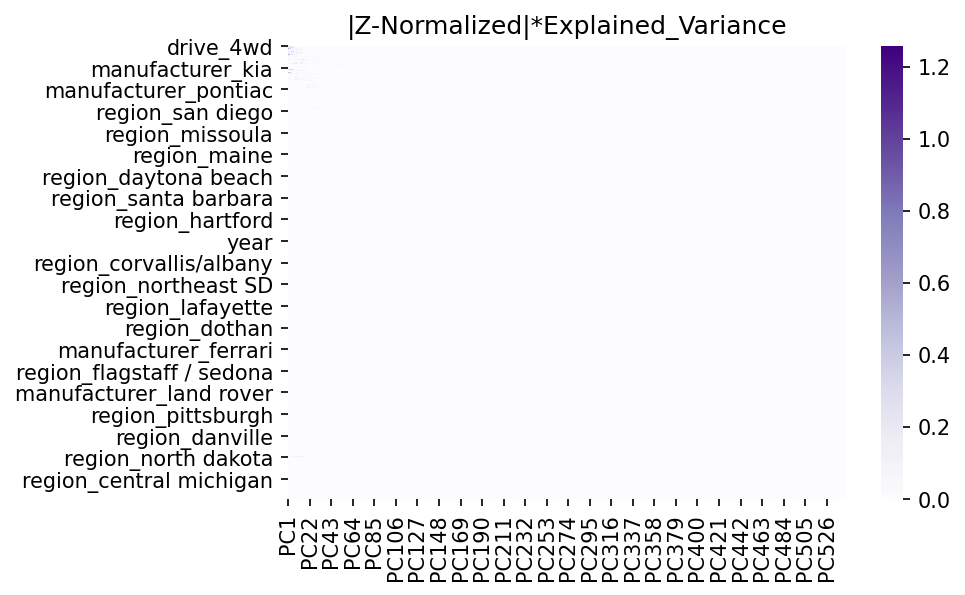

        score_                feature_
rank                                  
1     2.618915                type_SUV
2     2.606677              type_sedan
3     2.481936               drive_fwd
4     2.420408               drive_4wd
5     2.113675       manufacturer_ford
...        ...                     ...
540   0.006208  region_siskiyou county
541   0.006193   region_fort smith, AR
542   0.006078       region_susanville
543   0.005760     manufacturer_morgan
544   0.005728   region_sioux city, IA

[544 rows x 2 columns]


In [45]:
df = cars_norm
i = pca_full_report(df,df.columns)


*--- PCA Report ---*

X mean:		 price         15337.209769
year           2010.880753
condition         2.438394
cylinders         5.845829
odometer     100415.860473
                 ...      
state_vt          0.007302
state_wa          0.031713
state_wi          0.031933
state_wv          0.002088
state_wy          0.002572
Length: 544, dtype: float64 X variance:	 price        1.630291e+08
year         5.751629e+01
condition    9.686544e-01
cylinders    2.552081e+00
odometer     4.108877e+09
                 ...     
state_vt     7.248343e-03
state_wa     3.070714e-02
state_wi     3.091325e-02
state_wv     2.083625e-03
state_wy     2.565630e-03
Length: 544, dtype: float64
...Assuming data is properly scaled...

 -- Summary --
You can reduce from 544 to 1 dimensions while retaining 95% of variance.
2 principal components explain 100.00% of variance.
3 principal components explain 100.00% of variance.
X*X_pca: (544, 318011) * (318011, 544) = (544, 544)


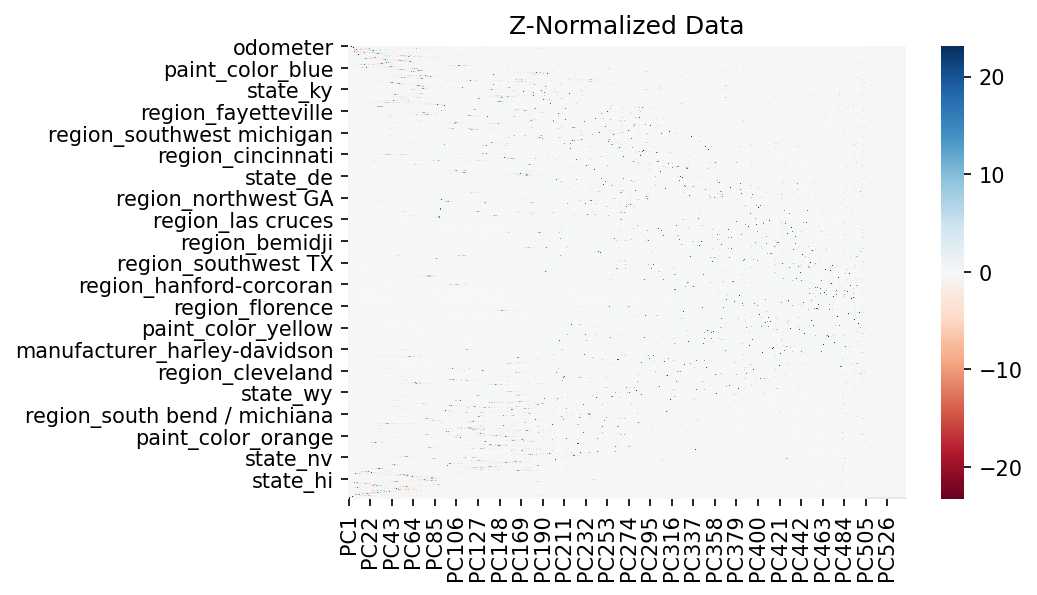

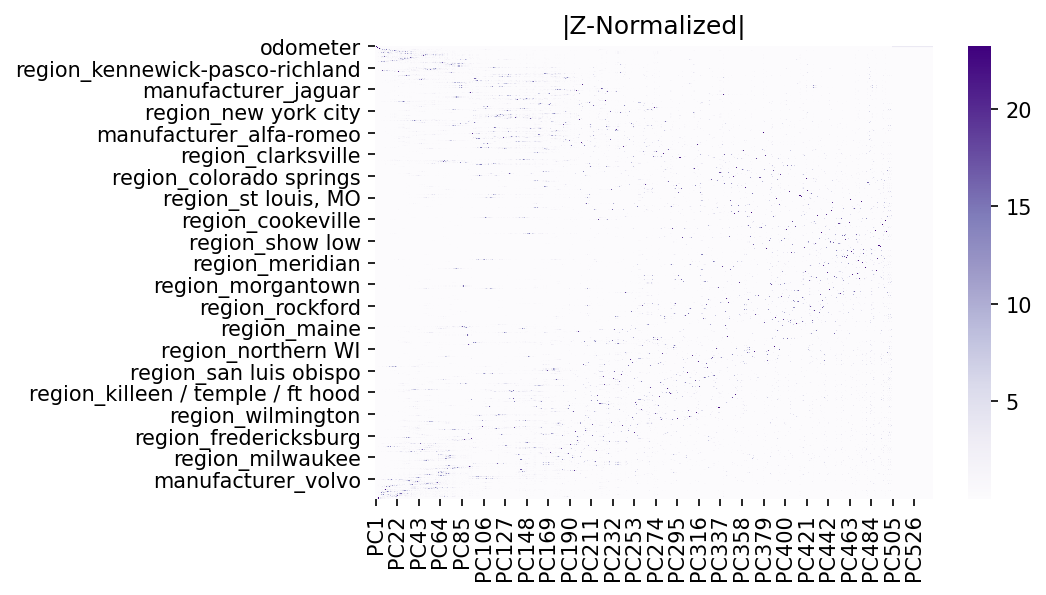

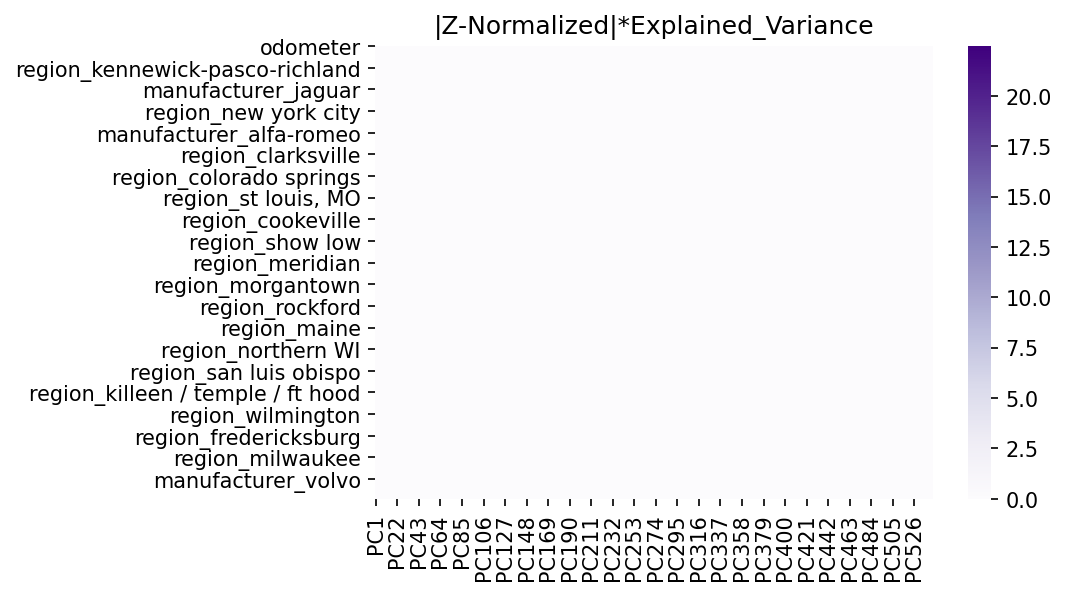

         score_     feature_
rank                        
1     22.558506     odometer
2      2.923245        price
3      0.039694         year
4      0.038837    condition
5      0.038734     fuel_gas
...         ...          ...
540    0.038713   type_truck
541    0.038708  fuel_diesel
542    0.038708    drive_4wd
543    0.038702         size
544    0.038666    cylinders

[544 rows x 2 columns]


In [46]:
df = encoded_cars
i = pca_full_report(df,df.columns)

Plots are a bit useless due to the scale, but reducing to PC254 may be an idea.

Also interesting how much the odometer score is compared to normalisd vs unnormalised
